# **Math for Machine Learning**

### Dr. Santosh Chapaneri
### Lead AI Product Engineer, Wolters Kluwer

## **Linear Algebra; Probability; Statistics; Optimization**

**Recommended Textbooks**:
- G. Strang, *Linear Algebra and Its Applications*, Academic Press 1980
- I. Goodfellow, Y. Bengio and A. Courville, *Deep Learning*, MIR Press 2016
- S. Boyd, *Convex Optimization*, Cambridge University Press 2004

# **I. Linear Algebra**

# **1. Matrices Fundamentals**

A matrix is a two-dimensional table.
Here is an example of a $3 \times 3$ matrix
\begin{equation}
A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}
\end{equation}

A vector is a $n \times 1$ vector (there are **row** and **column** vectors).

## **Distances and Norms**
- Norm is a **qualitative measure of length of a vector** and is typically denoted as $\Vert x \Vert$.


- The norm should satisfy certain properties:

    - $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$,
    - $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (triangle inequality),
    - If $\Vert x \Vert = 0$ then $x = 0$.


- The **distance** between two vectors is then defined as
$$    d(x, y) = \Vert x - y \Vert $$

## **Standard norms**
The most well-known and widely used norm is **Euclidean norm**:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

which corresponds to the distance in our real life (the vectors might have complex elements, thus is the modulus here).

## **$p$-norm**
Euclidean norm, or $2$-norm, is a subclass of an important class of $p$-norms:
$$
 \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}.
$$
There are two very important special cases:
- Infinity norm, or Chebyshev norm which is defined as the maximal element: $\Vert x \Vert_{\infty} = \max_i | x_i|$
- $L_1$ norm (or **Manhattan distance**) which is defined as the sum of modules of the elements of $x$: $\Vert x \Vert_1 = \sum_i |x_i|$  

## **Computing Norms**
The `numpy` package has all we need for computing norms (```np.linalg.norm``` function)

In [89]:
import numpy as np

a = np.ones(100)

print(np.linalg.norm(a, 1)) # L1 norm
print(np.linalg.norm(a, 2)) # L2 norm
print(np.linalg.norm(a, np.inf))

100.0
10.0
1.0


## **Matrix Norms**
How to measure distances between matrices?  

**Frobenius** norm of the matrix:
$$
  \Vert A \Vert_F = \Big(\sum_{i=1}^n \sum_{j=1}^m |a_{ij}|^2\Big)^{1/2}
$$

> Useful for computing objective function in machine learning for optimization

In [9]:
n = 100
a = np.random.randn(n, n)

norm_a = np.linalg.norm(a, 'fro')
print('Frobenius:', norm_a)

Frobenius: 100.08216240245233


# **2. Operations on Matrices**

The **Inner Product** is defined as
$$
   <x, y> = x^T y = \sum_{i=1}^n \overline{x}_i y_i,
$$
where $\overline{x}$ denotes the *complex conjugate* of $x$.

The Euclidean norm is then
$$    \Vert x \Vert^2 = <x, x> $$

=> the norm is **induced** by scalar product.



The **Outer Product** of vectors $x$ and $y$ is $xy^T$ (matrix with rank 1).



**Remarks**:
The **angle** between two vectors is defined as
$$
   \cos \phi = \frac{<x, y>}{\Vert x \Vert \Vert y \Vert}
$$

Two vectors $x$ and $y$ are **Orthogonal** if $<x, y> = 0$.

**Orthonormal vectors**: Vectors that satsify following condition are orthonormal
$ x_{i}^{T} x_{j} = 0$ when $i \neq j$ and
$ x_{i}^{T} x_{i} = 1 $

In [10]:
x = np.array([1.0, 4.0, 0.0])
y = np.array([2.0, 2.0, 1.0])

print("Dot product of x and y:",   np.dot(x, y))
print("Inner product of x and y:", np.inner(x, y))
print("Outer product of x and y:", np.outer(x, y))
print("Cross product of x and y:", np.cross(x, y))
# The Cross Product of two vectors is another vector that is
# at right angles to both

Dot product of x and y: 10.0
Inner product of x and y: 10.0
Outer product of x and y: [[2. 2. 1.]
 [8. 8. 4.]
 [0. 0. 0.]]
Cross product of x and y: [ 4. -1. -6.]


## **Matrix Inverse and Transpose**

In [21]:
# Determinant of Matrix
n = 6
M = np.random.randint(100,size=(n,n))

print(M)
print('Determinant:', np.linalg.det(M))

[[73 18 78 11 46 44]
 [76 35 52 61 71 14]
 [ 2 22  1 50 46 30]
 [26  2 77 64 82 50]
 [53 47 34 44 10 91]
 [ 7 32 33 43 34 47]]
Determinant: 16084426406.000015


In [23]:
# Inverse
A = np.random.randint(100, size=(5,5))

print(A)
print()

Ainv = np.linalg.inv(A)
print(Ainv)

[[47 77 53 65  5]
 [ 3 38 26 40 94]
 [37 17 15 30 88]
 [19 80 92 49 26]
 [80 87  1 68 63]]

[[-0.0042494  -0.02415891  0.02082851  0.00582649  0.0048855 ]
 [-0.03016771  0.00142934 -0.02245425  0.02038397  0.02321383]
 [ 0.00158854 -0.00974562  0.01406339  0.01051971 -0.00957056]
 [ 0.05374357  0.02344897 -0.00028527 -0.03728628 -0.02346626]
 [-0.01097791  0.00354882  0.00464403  0.00453051  0.00309258]]


In [25]:
# Matrix Transpose
A = np.array([[1,2,0], [3,5,9]])
print(A)
print()

print(A.T)

[[1 2 0]
 [3 5 9]]

[[1 3]
 [2 5]
 [0 9]]


## **Moore-Penrose Pseudo-Inverse of a Matrix**

$$ A^{+} = (A^{T}A)^{-1}A^{T} $$

In [28]:
# Moore-Penrose pseudo-inverse of a non-square matrix
A = np.random.randn(5, 3)
B = np.linalg.pinv(A)

print(A)
print()
print(B)

# Verify
np.allclose(A, np.dot(A, np.dot(B, A)))

[[-1.05776147  1.37666447  0.40450144]
 [-1.17096071  0.21145211 -0.54028023]
 [ 0.69223925  0.81507743 -1.20448921]
 [ 0.31137167 -0.60578191  1.98756293]
 [-0.42733806 -0.94359101  1.03481819]]

[[-0.15280442 -0.43334325  0.26889051  0.18318382 -0.20537989]
 [ 0.4892684  -0.17123619  0.22859522  0.13473989 -0.27337057]
 [ 0.24048778 -0.17350992 -0.06656942  0.35176352  0.02864666]]


True

> Used extensively in Machine Learning, for example, Extreme Learning Machine

## **Matrix Multiplication**

Consider composition of two linear operators:

1. $y = Bx$
2. $z = Ay$

Then, $z = Ay =  A B x = C x$, where $C$ is the **matrix-by-matrix product**.

A product of an $n \times k$ matrix $A$ and a $k \times m$ matrix $B$ is a $n \times m$ matrix $C$ with the elements  
$$
   c_{ij} = \sum_{s=1}^k a_{is} b_{sj}, \quad i = 1, \ldots, n, \quad j = 1, \ldots, m
$$

In [31]:
import numpy as np
def matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += None

In [35]:
n = 100
a = np.random.randn(n, n)
b = np.random.randn(n, n)

%timeit c = matmul(a, b)

%timeit c = np.dot(a, b)

ValueError: low >= high

# **3. Special Matrices**

## **Diagonal Matrix**

- Widely useful, eg. SVD

In [36]:
import numpy as np
v = np.array([2, 4, 3, 1])

np.diag(v)

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

## **Identity Matrix**

In [37]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [38]:
np.identity(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Show that for any matrix $A$,

$AI = IA = A$

In [ ]:
A = np.array([[4,2,1],[4,8,3],[1,1,0]])

I = np.identity(3, dtype=int)

np.dot(A,I)

In [ ]:
np.dot(A,I) == None

## **Unitary / Orthogonal Matrices**

A **Unitary** matrix is a matrix that when multiplied by its complex conjugate transpose matrix, equals the identity matrix.
$$ U^{H}U = UU^{H} = I $$

When $U^{H} = U^{\top}$, the matrix is called **Orthogonal**.

**Product of two unitary matrices is a unitary matrix:**  

$$(U V)^{H} U V = V^{H} (U^{H} U) V = V^{H} V = I$$

In [ ]:
a = 0.7
b = (1-a**2)**0.5

U = None

print(U)
print()

print(U.dot(U.conj().T))

# **4. Matrix Rank**

- The maximum number of linearly independent rows in a matrix $A$ is called the **row rank** of $A$, and the maximum number of linearly independent columns in $A$ is called **column rank** of $A$.

In [ ]:
# Computing matrix rank
import numpy as np

n = 50
a1 = np.ones((n, n))
a2 = np.array([[1, 0, -1], [0, 1, 0], [1, 0, 1]])

print('Rank of the matrix a1:', None)
print('Rank of the matrix a2:', None)

b = a1 + 1e-6 * np.random.randn(n, n) # adding very small Gaussian noise
print('Rank of the noisy matrix a1:', np.linalg.matrix_rank(b, tol=1e-8) )
# Boom!

## **Stability and Condition Number**

Example:
    \begin{split}\left(\begin{matrix}8&6&4&1\\1&4&5&1\\8&4&1&1\\1&4&3&6\end{matrix}\right)x = \left(\begin{matrix}19\\11\\14\\14\end{matrix}\right)\end{split}

In [ ]:
import numpy.linalg as LA

A = np.array([[8,6,4,1],[1,4,5,1],[8,4,1,1],[1,4,3,6]])

b = np.array([19,11,14,14])

None

In [ ]:
# Introduce tiny perturbations
b = np.array([19.01,11.05,14.07,14.05])

None

Note that the *tiny* perturbations in the outcome vector $b$ cause large differences in the solution! When this happens, we say that the matrix $A$ is **ill-conditioned**.

This happens when a matrix is close to being **singular** (i.e. non-invertible).

- The **Condition Number** is defined as:
 $$ cond(A) = ||A||\cdot ||A^{-1}|| $$


- Also, defined as

 $$ cond(A) = \frac{\lambda_1}{\lambda_n} $$

 where $\lambda_1$ is the maximum singular value of $A$ and $\lambda_n$ is the smallest.
  
- The **higher the condition number, the more unstable the system**.


In [ ]:
U, s, Vt = None
print('Condition number of A: ', max(s)/min(s))

# **5. SVD (Singular Value Decomposition) of Matrix**

- The SVD decomposition is a factorization of a matrix, with many useful **applications in computer vision, signal processing and deep learning**.


- The SVD decomposition of a matrix $A$ is of the form
$$ A = U \Sigma V^{T} $$


- Since $U$ and $V$ are orthogonal (this means that $U^{T} \times U = I$ and $V^{T} \times V = I$) we can write the inverse of $A$ as

$$ A^{-1} = V \Sigma^{-1} U^{T} $$


In [ ]:
A = np.floor(np.random.rand(4,4) * 20 - 10) # generating a random matrix

b = np.floor(np.random.rand(4,1) * 20 - 10) # system Ax = b

print(A)
print(b)

In [ ]:
U,s,Vt = None

# computing the inverse using pinv
pinv = None

# computing the inverse using the SVD decomposition
pinv_svd = None

print("Inverse computed by lingal.pinv()\n",pinv)
print("Inverse computed using SVD\n",pinv_svd)

Now, we can solve $ Ax = b $ using the inverse:
$$ Ax = b \implies x = A^{-1}b $$

In [ ]:
x = None

xPinv = None

print(x)
print(xPinv)

In [ ]:
# How much FAST is SVD for finding inverses?

n = 30

A = np.floor(np.random.rand(n,n) * 20 - 10) # generating a random matrix
U, s, Vt = None

# computing the inverse using pinv
%timeit None

# computing the inverse using the SVD decomposition
%timeit None


## **Application: Image Compression using SVD**

In [ ]:
from sklearn.datasets import load_sample_images
dataset = None

len(dataset.images)

In [ ]:
img = None
img.shape

In [ ]:
import matplotlib.pyplot as plt

lum_img = None
plt.imshow(lum_img, cmap='gray');

In [ ]:
# Obtain SVD
# full_matrices: If True (default), u and v have the shapes (M, M) and (N, N), respectively.
# Otherwise, the shapes are (M, K) and (K, N), respectively, where K = min(M, N).
U, S, Vt = None

In [ ]:
# Reconstruct
new_img = None

print(new_img.shape)
plt.imshow(new_img, cmap = 'gray');

In [ ]:
# Descending order of singular values
# print S
print(S.shape)

In [ ]:
S1 = None
n = 50 # Retaining top n singular values only
S1[n:, n:] = 0

In [ ]:
# Reconstruct using only top n singular values
img_c = None

plt.imshow(img_c, cmap = 'gray');

Good compression performance with only 50 out of 512 singular values!

# **Exercise**

### Write a function in Python to solve a system $ Ax = b $ using SVD decomposition.
- Your function should take $A$ and $b$ as input and return $x$.

- Your function should include the following:

    + First, check that $A$ is invertible - return error message if it is not (*Hint*: product of singular values should be non-zero for invertibility)
    + Invert $A$ using SVD and solve (Remember: $ A^{-1} = V \Sigma^{-1} U^{T} $)
    + return $x$


Let A = np.array([[1,1],[1,2]]) and
b = np.array([3,1])

In [ ]:
def svdsolver(A, b):
    None

A = np.array([[1,1],[1,2]])
b = np.array([3,1])
print(np.linalg.solve(A,b))
print(svdsolver(A,b))

# **6. Eigen-things**

## What is an eigenvector
An vector $x \ne 0$ is called an **eigenvector** of a square matrix $A$ if there exists a number $\lambda$ such that  
$$
   Ax = \lambda x.
$$
The number $\lambda$ is called an **eigenvalue**.  

In [40]:
import numpy as np
import numpy.linalg as LA
A = np.array([[2,3], [4,5]])
print(A)

w, v = LA.eig(A)
print('Eigen Values:', w)
print('Eigen Vectors:')
print(v)

[[2 3]
 [4 5]]
Eigen Values: [-0.27491722  7.27491722]
Eigen Vectors:
[[-0.79681209 -0.49436913]
 [ 0.60422718 -0.86925207]]


# **7. Application: Least-Squares Linear Regression**

In [41]:
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

- Fit slope and intercept so that the linear regression fit minimizes the sum of the residuals (vertical offsets or distances)


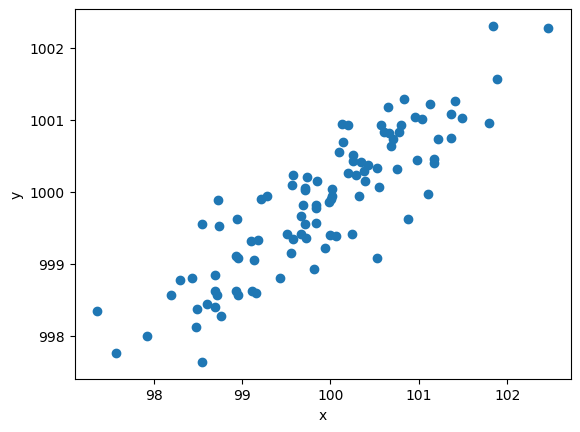

In [51]:
rng = np.random.RandomState(123)

mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]

sample = rng.multivariate_normal(mean, cov, size=100)

x, y = sample[:, 0], sample[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- Closed-form (analytical) solution:

$$ L = \frac{1}{2} \sum_{i=1}^{N} (y_i - x_i^{\intercal}w)^2 = \frac{1}{2} \|  y - Xw \|^2  = \frac{1}{2} (y - Xw)^{\intercal}(y - Xw)  $$

$$ \frac{\partial L}{\partial w} = -y^{\intercal}X + w^{\intercal}X^{\intercal}X = 0 $$

$$w = (X^T X)^{-1} X^T y$$

In [52]:
# x.shape => (100,)
# newaxis: increase the dimension of existing array by one more dimension
X = x[:, np.newaxis]
# X.shape => (100,1)
print(X.shape[0])

100


In [53]:
# adding a column vector of "ones"
# hstack: stack arrays in sequence horizontally (column wise)
Xb = np.hstack((np.ones((X.shape[0], 1)), X))

# Xb.shape => (100, 2); first column for bias, second column for X
w = np.zeros(Xb.shape[1])

# Closed-form solution
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

b, w1 = w[0], w[1]

print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)

slope: 0.84
y-intercept: 915.59


### **Show line fit**

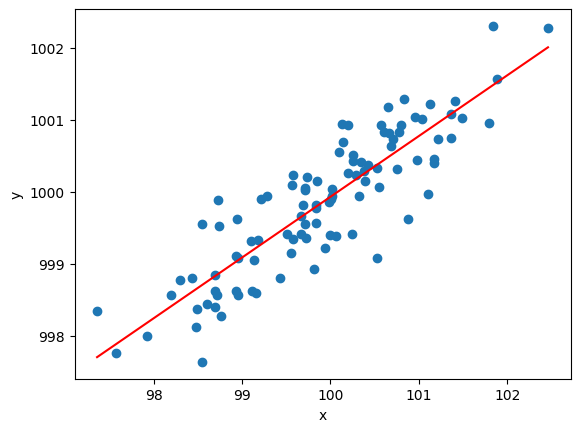

In [54]:
extremes = np.array([np.min(x), np.max(x)])

predict = extremes*w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **Evaluate**

#### **Mean squared error (MSE)**

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y_i}\big)^2$$

In [55]:
y_predicted = x*w1 + b

mse = np.mean((y - y_predicted) ** 2)
mse

np.float64(0.21920128791623855)

In [56]:
rmse = np.sqrt(mse)
rmse

np.float64(0.4681893718531408)

# **II. Probability**

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## **Probability Mass Functions**
- Goal of probability and uncertainty computations is to estimate population parameters from samples

## **Bernoulli Trial**
Bernoulli trial (or binomial trial): random experiment with 2 possible outcomes

In [62]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=[10000])

heads = np.sum(coin_flips)
heads

np.int64(520)

In [63]:
tails = coin_flips.shape[0] - heads
tails

np.int64(480)

In [64]:
rng = np.random.RandomState(123)

for i in range(7):
    num = 10 ** i
    coin_flips = rng.randint(0, 2, size=[num])
    heads_proba = np.mean(coin_flips)
    print('Heads chance: %.2f' % (heads_proba*100))

Heads chance: 0.00
Heads chance: 40.00
Heads chance: 47.00
Heads chance: 53.70
Heads chance: 49.53
Heads chance: 49.80
Heads chance: 50.03


### **Do 100 coin flips 1000 times:**

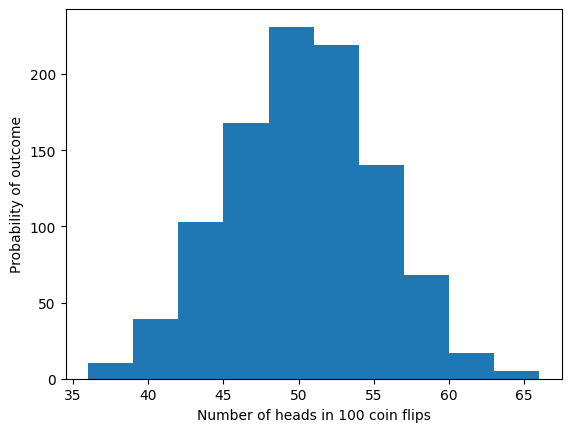

In [66]:
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments)

for i in range(n_experiments):
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

plt.hist(outcomes)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()

### **Repeat with biased coin**

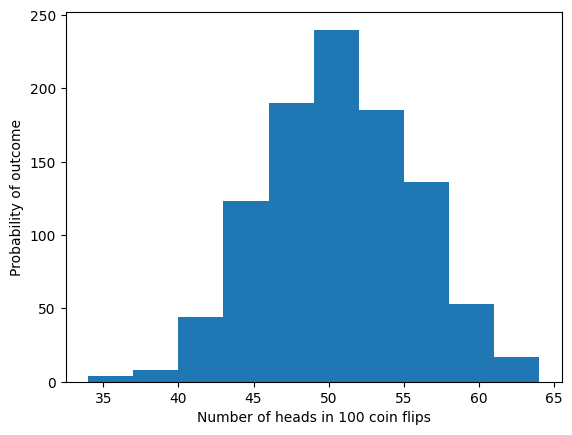

In [67]:
p = 0.7
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments)

for i in range(n_experiments):
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    head_counts = np.sum(coin_flips < p)
    outcomes[i] = head_counts

plt.hist(outcomes)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()

## **Binomial Distribution**

- Bernoulli trial (or binomial trial): random experiment with 2 possible outcomes
- a binomial distribution describes a binomial variable $B(n, p)$ of
*n* of Bernoulli trials (which are statistically independent); *p* is the probability of success (and *q* is the probability of failure, 1-*p*)
- Probability of *k* successes:

$$P(k) = \binom{n}{k} p^k q^{n-k}$$

where $\binom{n}{k}$ ("*n choose k*") is the binomial coefficient

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

### **Compute probability of 50 heads in 100 Bernoulli trials flipping a fair coin:**

In [ ]:
def factorial(n):
    None

def combin(n, k): # "n choose k*
    None

In [ ]:
p = 0.5 # probability of success
n = 100 # n_trials
k = 50 # k_successes

proba = None
proba

In [ ]:
# Direct method
rv = None
rv.None

## **Probability Density Functions (PDFs)**

- for working with continuous variables (vs. probability mass functions for discrete variables)


- here, the area under the curve give the probability (in contrast to probability mass functions where we have probabilities for every single value)


- the area under the whole curve is 1

## **Normal Distribution (Gaussian Distribution)**

### **Probability Density Function of the Normal Distribution**

- unimodal and symmetric


- many algorithms in machine learning & statistics have normality assumptions


- two parameters: mean (center of the peak) and standard deviation (spread); $\mu, \sigma$


- we can estimate parameters of $\mathcal{N}(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$)


- univariate Normal distribution:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$


- standard normal distribution with zero mean and unit variance, $\mathcal{N}(0, 1)$

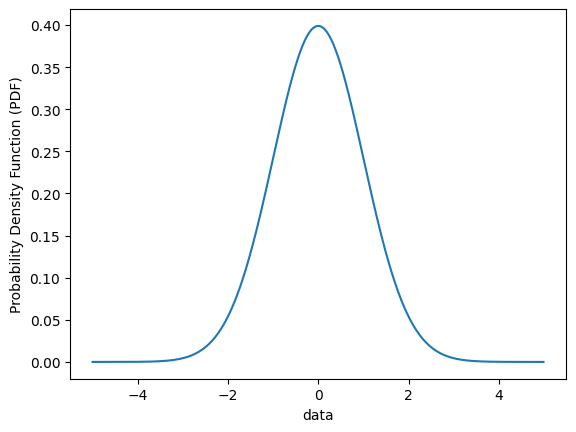

In [69]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2 * np.pi * variance)) * np.exp(-np.square(x - mean) / (2 * variance))

mean = 0
stddev = 1

x = np.arange(-5, 5, 0.01)

y = univariate_gaussian_pdf(x, mean, stddev**2)

plt.plot(x, y)
plt.xlabel('data')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

# **Application: Anomaly Detection**

### **Multi-variate Normal (MVN)**

$$ \mathcal{N}(x | \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^{D}}} \frac{1}{\sqrt{|\Sigma|}} \exp \left( - \frac{1}{2} (x - \mu)^{\intercal} \Sigma^{-1} (x - \mu) \right) $$


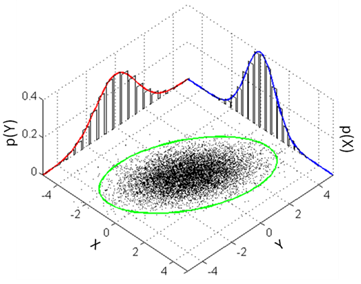

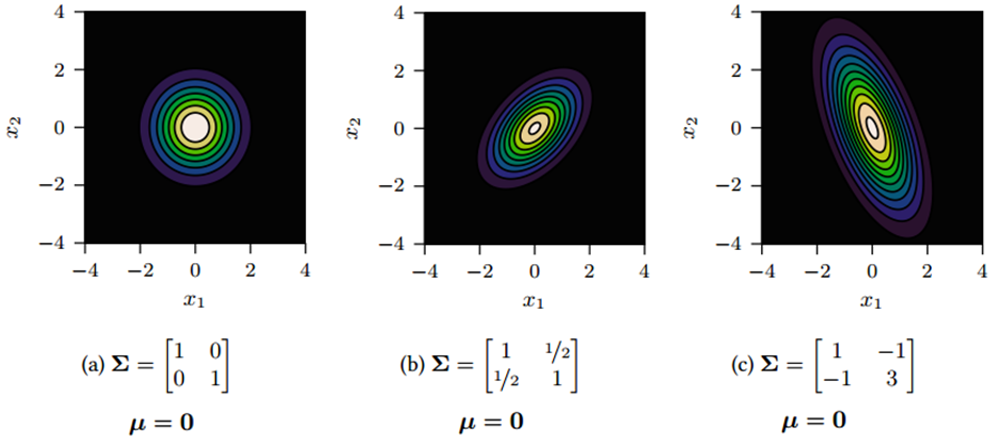

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.stats import multivariate_normal

In [71]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

tr_data = read_dataset('../data/anomaly_detect_data.csv')

In [72]:
n_training_samples = tr_data.shape[0]
n_dim =tr_data.shape[1]

print('Number of datapoints in training set: %d' % n_training_samples)
print('Number of dimensions/features: %d' % n_dim)
print(tr_data[1:5,:])

Number of datapoints in training set: 307
Number of dimensions/features: 2
[[13.409 13.763]
 [14.196 15.853]
 [14.915 16.174]
 [13.577 14.043]]


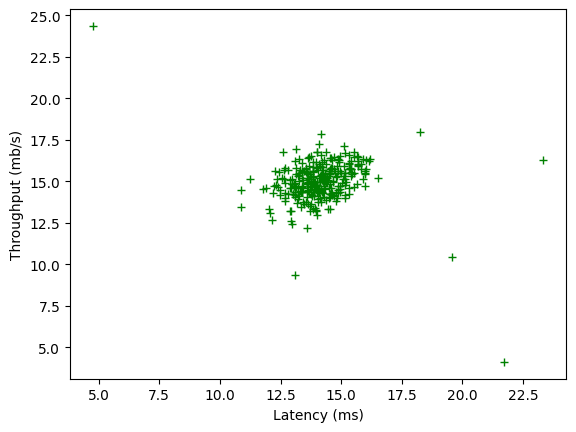

In [82]:
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[:, 0], tr_data[:, 1],'g+')
plt.show()

In [83]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset, rowvar=False)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [84]:
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data,mu,sigma)

In [85]:
thresh = 9e-05
# determining outliers/anomalies
outliers = np.asarray(np.where(p < thresh))
outliers

array([[300, 301, 303, 304, 305, 306]])

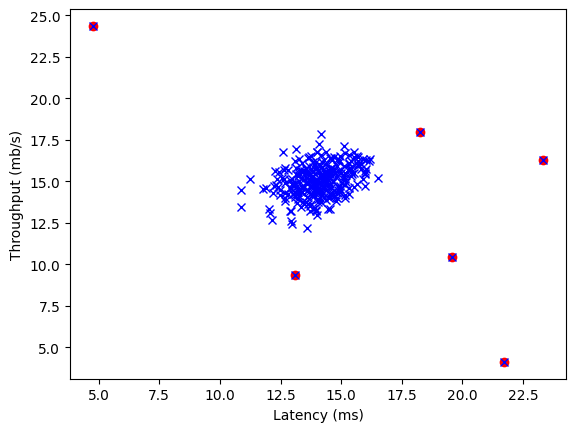

In [87]:
plt.figure()
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[outliers,0],tr_data[outliers,1],'ro')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.show()

# **III. Statistics**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

# import some data to play with
data = None
df = pd.DataFrame(data = None, columns = None)
df.head()

In [ ]:
def histo():
    # create histogram
    bin_edges = np.arange(0, df['sepal length (cm)'].max() + 1, 0.5)
    fig = plt.hist(df['sepal length (cm)'], bins=bin_edges)

    # add plot labels
    plt.xlabel('count')
    plt.ylabel('sepal length')

histo()
plt.show()

### **Sample Mean:**

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$$

In [ ]:
x = df['sepal length (cm)'].values
sum(i for i in x) / len(x)

In [ ]:
x_mean = None
x_mean

In [ ]:
histo()
plt.axvline(x_mean, color='darkorange')
plt.show()

### **Sample Variance:**

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

- Bessel's correction to correct the bias of the population variance estimate
- Note the $unit$ of the variable is now $unit^2$

In [ ]:
sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)

In [ ]:
var = None
var

In [ ]:
histo()
plt.axvline(x_mean + var, color='darkorange')
plt.axvline(x_mean - var, color='darkorange')
plt.show()

### **Sample Standard Deviation:**

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [ ]:
np.sqrt(np.var(x, ddof=1))

In [ ]:
std = None
std

### **Min/Max:**

In [ ]:
print(np.min(x))
print(np.max(x))

### **25th and 75th Percentile:**

In [ ]:
np.percentile(x, q=None, method='lower')

### **Median (50th Percentile):**

In [ ]:
np.median(x)

## **Covariance and Correlation**

In [ ]:
# read dataset
X = None
X.shape

## **Sample Covariance**

- Measures how two variables differ from their mean

- Positive Covariance: that the two variables are both above or both below their respective means
     - variables are positively "correlated" -- they go up or down together

- Negative Covariance: valuables from one variable tends to be above the mean and the other below their mean
     - negative covariance means that if one variable goes up, the other variable goes down

$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$


- note that similar to variance, the dimension of the covariance is $unit^2$

In [ ]:
# Compute covariance between 2nd and 3rd feature:

x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

sum([(x - x_mean) * (y - y_mean)
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

Covariance matrix for the 4-feature dataset:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  & \sigma_{1,2} & \sigma_{1,3} & \sigma_{1,4} \\
    \sigma_{2,1}  & \sigma_{2}^2 & \sigma_{2,3} & \sigma_{2,4} \\
    \sigma_{3,1}  & \sigma_{3,2} & \sigma_{3}^2 & \sigma_{4,3} \\
    \sigma_{4,1}  & \sigma_{4,2} & \sigma_{4,3} & \sigma_{4}^2
\end{bmatrix}
$$

- Notice the variance along the diagonal
- Remember, the sample variance is computed as follows:

$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [ ]:
np.None

## **Pearson Correlation Coefficient**

- Pearson correlation is "dimensionless" version of the covariance, achieved by dividing by the standard deviation


- Pearson correlation coefficient:

$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$

$$ = \frac{\sigma_{x,y}}{\sigma_x \sigma_y} $$


- Measures degree of a linear relationship between variables, assuming the variables follow a normal distribution
    - $\rho=1$: perfect positive correlation
    - $\rho=-1$: perfect negative correlation
    - $\rho=0$: no correlation

In [ ]:
plt.scatter(X[:, 2], X[:, 3]);

In [ ]:
(np.cov(X[:, 2:4].T)[0, 1] /
 (np.std(X[:, 2], ddof=1) * np.std(X[:, 3], ddof=1)))

In [ ]:
np.None

## **Scaled Variables**

### **Standardization**

$$ Z = \frac{X - \mu}{\sigma} $$

In [ ]:
from sklearn import preprocessing
import numpy as np

X_train = np.array([[ 100., -1.,  2.],[ 150.,  0.,  0.],[ 180.,  1., -1.]])
print(X_train)

X_scaled = None
print(X_scaled)

- Scaled data has zero mean and unit variance:

In [ ]:
X_scaled.mean(axis=0)

In [ ]:
X_scaled.std(axis=0)

### **Min-Max Scaler aka Normalization**

$$ Z = \frac{X - \min(X)}{\max(X) - \min(X)} $$

In [ ]:
X_train = np.array([[ 100., -1.,  2.],
...                 [ 150.,  0.,  0.],
...                 [ 180.,  1., -1.]])
...
min_max_scaler = None
X_train_minmax = None
X_train_minmax

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [ ]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_minmax = None
X_test_minmax

# **IV. Optimization**

## **Gradient Descent**

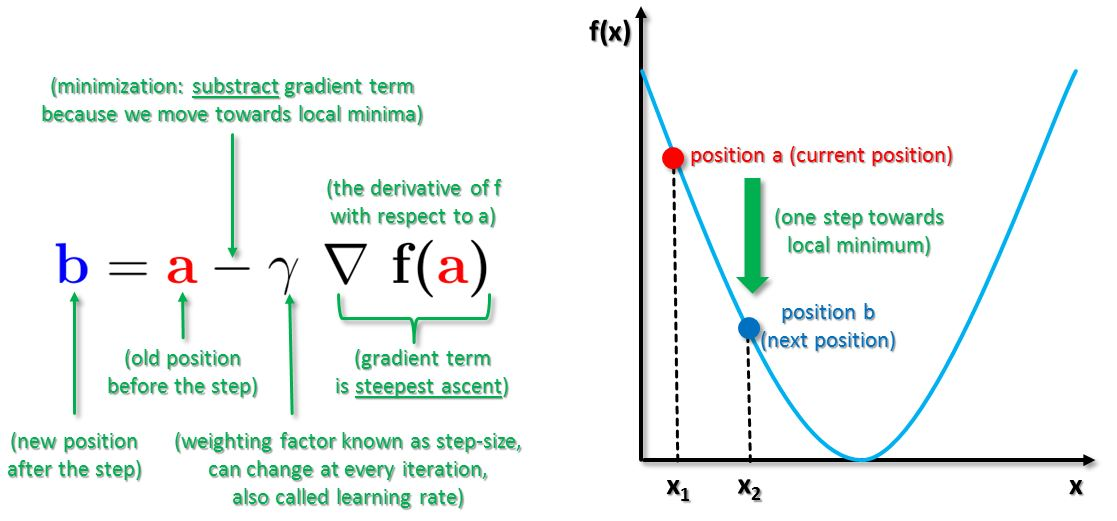

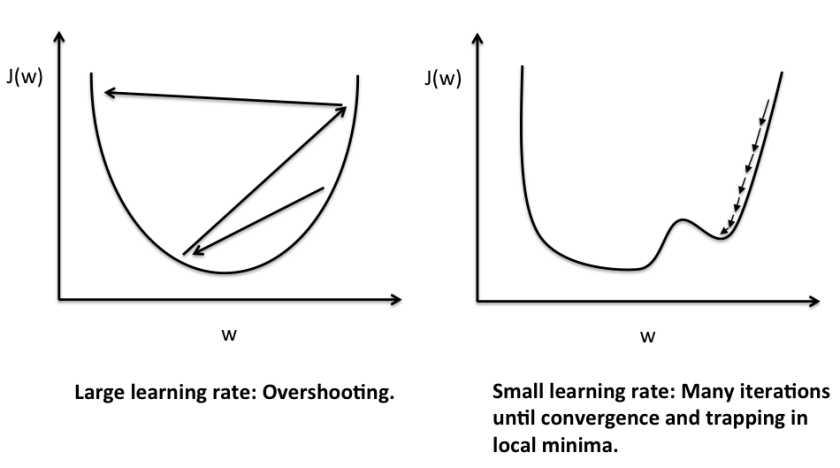

f(x): Objective function & optimization problem is min(f(x))

## **Batch Gradient Descent**

Assume that we have a vector of parameters $\theta$ and a cost function $J(\theta)$ which is the variable we want to minimize (our objective function). Typically, the objective function has the form:

$$J(\theta) =\sum_{i=1}^m J_i(\theta)$$

where $J_i$ is associated with the $i$-th observation in our data set.

- The batch gradient descent algorithm, starts with some initial feasible  $\theta$ (which we can either fix or assign randomly) and then repeatedly performs the update:

$$\theta := \theta - \eta \nabla_{\theta} J(\theta) = \theta -\eta \sum_{i=1}^m \nabla J_i(\theta)$$

where $\eta$ is a constant controlling step-size and is called the learning rate.

- Note that in order to make a single update, we need to calculate the gradient using the **entire dataset**. This can be very **inefficient for large datasets**.

- In code, batch gradient descent looks like this:

```python
for i in range(n_epochs):
  params_grad = evaluate_gradient(loss_function, data, params)
  params = params - learning_rate * params_grad
```
  
- For a given number of epochs $n_{epochs}$, we first evaluate the gradient vector of the loss function using **ALL** examples in the data set, and then we update the parameters with a given learning rate.

- Batch gradient descent is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.

## Stochastic Gradient Descent (SGD)

- When we have very large data sets, the calculation of $\nabla (J(\theta))$ can be costly as we must process every data point before making a single step (hence the name "batch").


- An alternative approach, the stochastic gradient descent method, is to update $\theta$ sequentially with every observation. The updates then take the form:

$$\theta := \theta - \alpha \nabla_{\theta} J_i(\theta)$$


- This allows us to start making progress on the minimization problem right away. It is **computationally cheaper**, but it results in a **larger variance** of the loss function in comparison with GD.


- In code, the algorithm should look something like this:

```python
for i in range(nb_epochs):
  np.random.shuffle(data)
  for example in data:
    params_grad = evaluate_gradient(loss_function, example, params)
    params = params - learning_rate * params_grad
```

- For a given epoch, we first reshuffle the data (to avoid bias from a particular order), and then for a single example, we evaluate the gradient of the loss function and then update the params with the chosen learning rate.

## Mini-batch SGD

- What if instead of single example from the dataset, we use a batch of data examples with a given size every time we calculate the gradient:

$$\theta = \theta - \eta \nabla_{\theta} J(\theta; x^{(i:i+n)}; y^{(i:i+n)})$$


- Using mini-batches has the advantage that the **variance in the loss function is reduced**, while the **computational burden is still reasonable**, since we do not use the full dataset.


- The size of the mini-batches becomes another hyper-parameter of the problem. In standard implementations it ranges from 50 to 256.


- In code, mini-batch gradient descent looks like this:

```python
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    params_grad = evaluate_gradient(loss_function, batch, params)
    params = params - learning_rate * params_grad
```

- The difference with SGD is that for each update we use a batch of few examples  (eg. 100) to estimate the gradient.

## **Linear Regression using Gradient Descent**

In [92]:
import pandas as pd
points = pd.read_csv('../data/gd_data.csv', header=None)

In [93]:
points.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
points.shape

In [94]:
points_np = np.asarray(points)

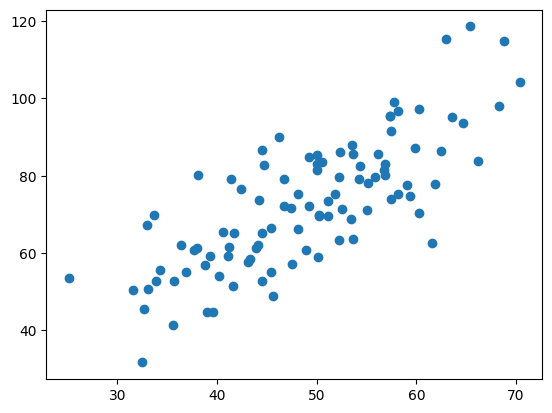

In [95]:
plt.scatter(points_np[:,0],points_np[:,1])

In [99]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error(b, m, points):
    total_error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m*x + b)) ** 2
    return total_error / float(len(points))

In [104]:
# update slope and y-intercept
def step_gradient(b_current, m_current, points, learningRate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        b_gradient += -(2/N) * x * (y - (m_current * x + b_current))

    # new slope
    new_m = m_current - (learningRate * m_gradient)
    # new y-intercept
    new_b = b_current - (learningRate * b_gradient)
    return [new_b, new_m]

In [105]:
def run_gradient_descent(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    # iterative optimization using GD
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [109]:
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10000

print("Starting gradient descent at b = {0}, m = {1}, error = {2}".
    format(initial_b, initial_m, compute_error(initial_b, initial_m, points_np)))

print("Running...")

[b, m] = run_gradient_descent(points_np, initial_b, initial_m, learning_rate, num_iterations)

print("After {0} iterations b = {1}, m = {2}, error = {3}".
format(num_iterations, b, m, compute_error(b, m, points_np)))

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10000 iterations b = 1.4509717502781103, m = 1.4509717502781103, error = 111.87217657249953
